In [2]:
# Bir resmi farklı bir resimde piksel kaydırarak arama yöntemi.

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [12]:
full = cv2.imread('../DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

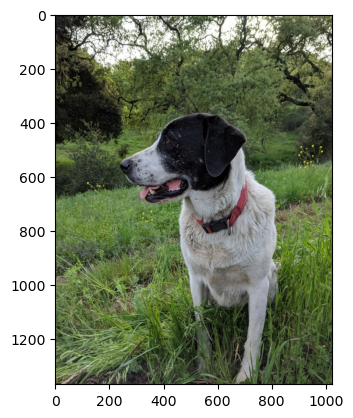

In [13]:
plt.imshow(full)

In [14]:
face= cv2.imread('../DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

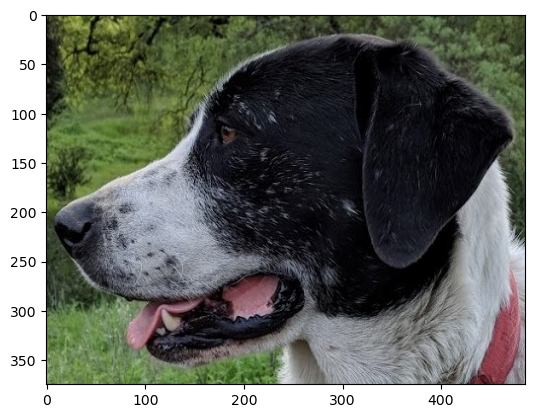

In [15]:
plt.imshow(face)

In [16]:
# eval() fonksiyonu kullanimi

mystring = 'sum'

In [17]:
eval(mystring)

<function sum(iterable, /, start=0)>

In [19]:
myfunc = eval(mystring)

In [20]:
myfunc([1,2,3,])

6

-----------------------------

In [21]:
height, width, channels = face.shape

In [22]:
height

375

In [23]:
width

486

In [24]:
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

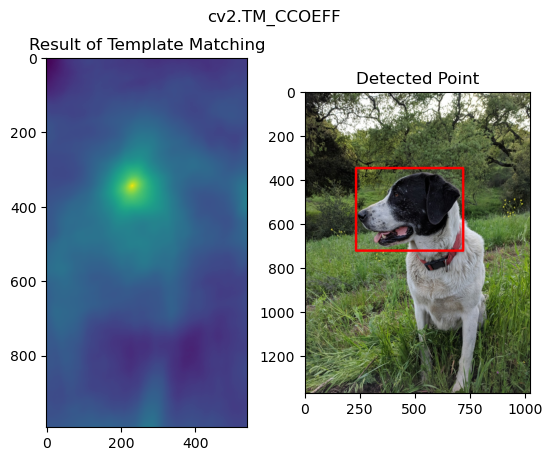

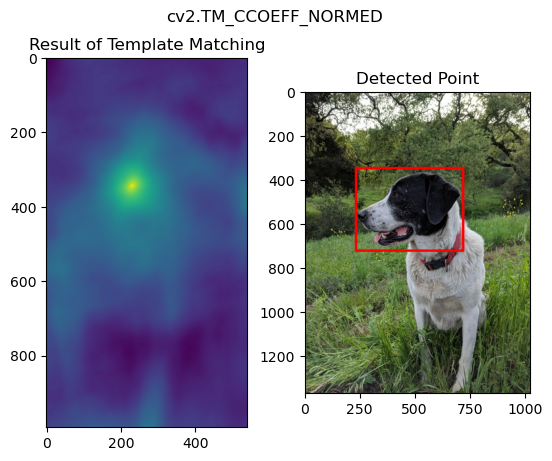

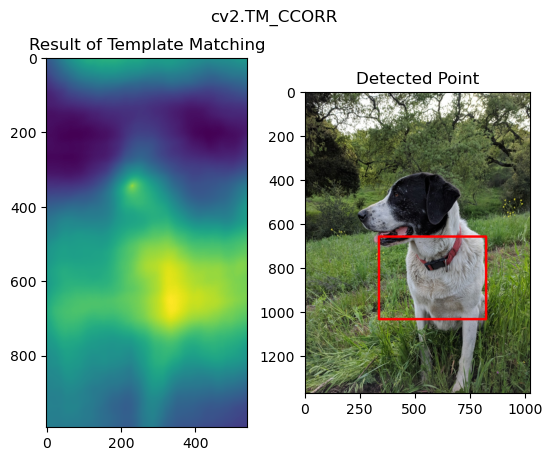

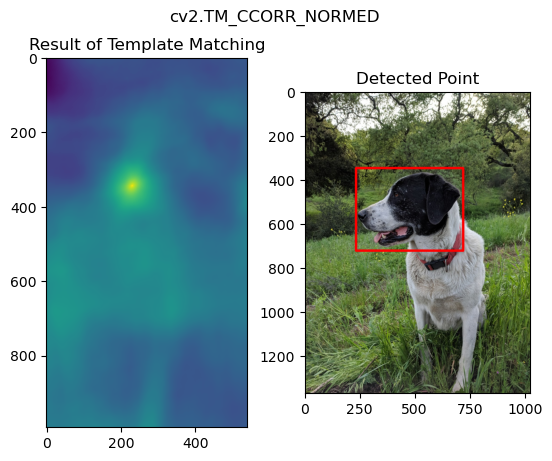

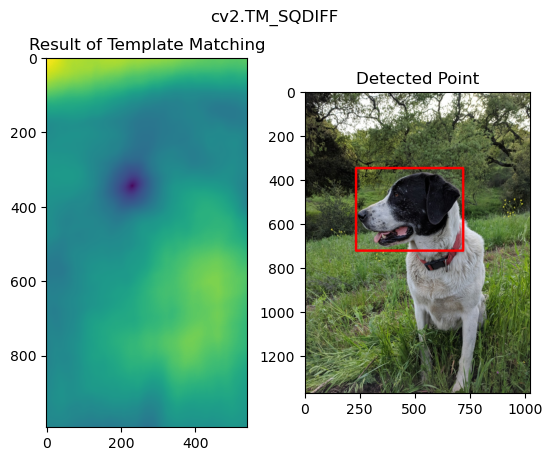

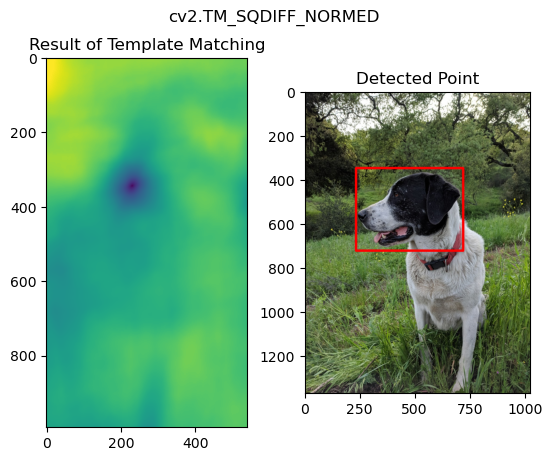

In [26]:
for m in methods:

    # Create a copy of the image
    full_copy = full.copy()

    # Get the actual function instead of the string
    method = eval(m)

    # Apply template Matching with the method
    res = cv2.matchTemplate(full_copy,face,method)

    # Grab the Max and Min values, plus their locations 
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # Set up drawing of Rectangle

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0]+width, top_left[1]+height)

    cv2.rectangle(full_copy,top_left,bottom_right,255,10)

    # Plot the Images
    plt.subplot(121)  # 2 images in 1 line, capture the 1st picture
    plt.imshow(res)
    plt.title('Result of Template Matching')

    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)

    plt.show()


